<a href="https://colab.research.google.com/github/nathsmo/Victimas_PNC_2017/blob/master/Procesamiento2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Segundo Procesamiento de datos

* Segundo análisis creado a partir de una investigación personal después de la clase y entrega original del proyecto.

## Importar librerias

In [1]:
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Ridge
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from IPython.display import Image
from sklearn.metrics import mean_squared_error, confusion_matrix, classification_report
from sklearn.externals.six import StringIO  
from sklearn import metrics
import pandas as pd
import numpy as np  
import pydotplus
import matplotlib.pyplot as plt  
from sklearn.model_selection import train_test_split  
from sklearn.model_selection import cross_val_score
from pandas import DataFrame
import statsmodels.api as sm
import seaborn as sns
import scipy.stats as stats
import sklearn
import matplotlib
matplotlib.rcParams.update({'font.size': 12})

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


## Importando CSV

In [2]:
from google.colab import files
uploaded = files.upload()

Saving vic_final.csv to vic_final.csv


In [0]:
df = pd.read_csv('vic_final.csv')
df.drop(u'Unnamed: 0', axis=1, inplace=True)# irrelevante

## División de regiones de la data


* Reference for dividing the regions: https://aprende.guatemala.com/historia/geografia/regiones-de-guatemala/

### Departamentos segun código

| Codigo  | Departamento      |
|----|----------------|
| 1  | Guatemala      |
| 2  | El Progreso    |
| 3  | Sacatepéquez   |
| 4  | Chimaltenango  |
| 5  | Escuintla      |
| 6  | Santa Rosa     |
| 7  | Sololá         |
| 8  | Totonicapán    |
| 9  | Quetzaltenango |
| 10 | Suchitepéquez  |
| 11 | Retalhuleu     |
| 12 | San Marcos     |
| 13 | Huehuetenango  |
| 14 | Quiché         |
| 15 | Baja Verapaz   |
| 16 | Alta Verapaz   |
| 17 | Petén          |
| 18 | Izabal         |
| 19 | Zacapa         |
| 20 | Chiquimula     |
| 21 | Jalapa         |
| 22 | Jutiapa        |


In [0]:
metro = [1]
norte = [15, 16]
nor_or = [18, 19, 2, 20]
sur_or = [21, 22, 6]
central = [4, 3, 5]
sur_oc = [12, 11, 9, 8, 7, 10]
nor_oc = [13, 14]
peten = [17]

reg = []

In [0]:
for i in df['dept']:
    if i in metro:
        reg.append("metro")
    elif i in norte:
        reg.append("norte")
    elif i in nor_or:
        reg.append("nor_or")    
    elif i in sur_or:
        reg.append("sur_or")    
    elif i in central:
        reg.append("central") 
    elif i in sur_oc:
        reg.append("sur_oc")    
    elif i in nor_oc:
        reg.append("nor_oc")
    elif i in peten:
        reg.append("peten")

In [0]:
df['region'] = reg

In [57]:
df.head()

,mes,dia,dia_sem,hora,g_hora,area,dept,muni,sexo,edad,g_edad,mayor_menor,delito,g_delitos,region
0,1,1,7,3,1,2,1,115,1,22,5,1,69,4,metro
1,1,1,7,19,4,2,2,207,1,24,5,1,69,4,nor_or
2,1,2,1,8,2,2,19,1901,1,35,8,1,75,3,nor_or
3,1,2,1,18,4,1,5,501,1,27,6,1,75,3,central
4,1,2,1,12,3,2,10,1001,1,62,13,1,75,3,sur_oc


In [0]:
Region_Count_Table = df.region.value_counts()

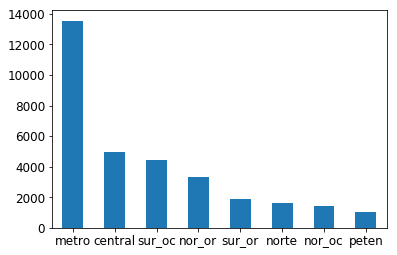

In [9]:
Region_Count_Table.plot.bar(x='lab', y='val', rot=0)

* There are probably more crimes reported in the City because there's more police presence there. Also it is easier to go and report a crime than in the outside. 
* It is interesting how the North Occidental and North region have almost the same crime.


* The crime group are in order of less serious to fatal and worst.

[0] Detenciones

[1] Crímenes leves

[2] Lesiones 

[3] Hurto leve 

[4] Robo 

[5] Extorsión 

[6] Muerte  


## Division of crimes on the city

In [0]:
ciudad = df.loc[df.dept ==1]

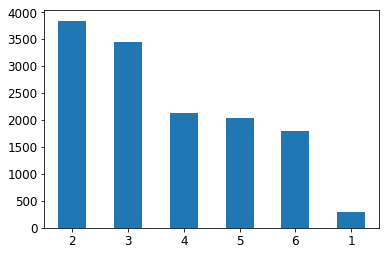

In [11]:
Ciudad_Count_Table = ciudad.g_delitos.value_counts()
Ciudad_Count_Table.plot.bar(x='lab', y='val', rot=0)

## Division of crimes in Fraijanes


In [0]:
fraijanes = ciudad.loc[ciudad.muni ==113]
#fraijanes.drop(['muni', 'dept', 'region'], axis=1)

### Creation of different Counting Tables

In [0]:
Fraijanes_mes_Count_Table = fraijanes.mes.value_counts()
Fraijanes_dia_sem_Count_Table = fraijanes.dia_sem.value_counts()
Fraijanes_g_hora_Count_Table = fraijanes.g_hora.value_counts()
Fraijanes_area_Count_Table = fraijanes.area.value_counts()
Fraijanes_sexo_Count_Table = fraijanes.sexo.value_counts()
Fraijanes_g_edad_Count_Table = fraijanes.g_edad.value_counts()
Fraijanes_delito_Count_Table = fraijanes.delito.value_counts()

In [0]:
Fraijanes_mes_Count_Table.plot.bar(x='lab', y='val', rot=0)

In [0]:
Fraijanes_dia_sem_Count_Table.plot.bar(x='lab', y='val', rot=0)

In [0]:
Fraijanes_g_hora_Count_Table.plot.bar(x='lab', y='val', rot=0)

In [0]:
Fraijanes_area_Count_Table.plot.bar(x='lab', y='val', rot=0)

In [0]:
Fraijanes_sexo_Count_Table.plot.bar(x='lab', y='val', rot=0)

In [0]:
Fraijanes_g_edad_Count_Table.plot.bar(x='lab', y='val', rot=0)

In [0]:
Fraijanes_delito_Count_Table.plot.bar(x='lab', y='val', rot=0)

## Funcion para identificacion de los crimenes dentro de un area

In [18]:
del_com = Fraijanes_delito_Count_Table.reset_index(name='Delitos en Fraijanes')
del_com["Delito"] = ['Homicidio por arma de fuego', 'Desaparecido', 'Robo a residencias', 'Extorsion a comercios', 'Lesiones por armas blanca', 'Lesiones por arma de fuego',
                    'Robo de armas de fuego', 'Extorsion a residencias', 'Homicidio por arma contundente', 'Hurto a residencias',
                    'Hurto de armas de fuego', 'Robo de vehiculos', 'Lesiones por arma contundente', 'Robo a peatones', 'Otras causas (detenidos)', 'Homicidio por estrangulamiento', 'Hurto a comercios',
                    'Robo a comercios', 'Hurto de motocicletas', 'Hurto de vehiculos', 'Homicidio por arma blanca', 'Robo de motocicletas', 'Intento de suicidio por arma de fuego', 
                    'Robo en iglesias', 'Extorsion a transporte escolar', 'Suicidio por arma blanca']
del_com["Gravedad"] = ["HOMICIDIO","DESAPARICION","ROBO","EXTORSION","LESION","LESION","ROBO","EXTORSION","HOMICIDIO","HURTO","HURTO",'ROBO','LESION','ROBO','OTRO','HOMICIDIO','HURTO','ROBO','HURTO','HURTO','HOMICIDIO','ROBO','LESION','ROBO','EXTORSION','HOMICIDIO']
del_com

,index,Delitos en Fraijanes,Delito,Gravedad
0,1,18,Homicidio por arma de fuego,HOMICIDIO
1,71,13,Desaparecido,DESAPARICION
2,19,11,Robo a residencias,ROBO
3,97,9,Extorsion a comercios,EXTORSION
4,8,8,Lesiones por armas blanca,LESION
5,7,7,Lesiones por arma de fuego,LESION
6,69,7,Robo de armas de fuego,ROBO
7,104,5,Extorsion a residencias,EXTORSION
8,3,5,Homicidio por arma contundente,HOMICIDIO
9,81,5,Hurto a residencias,HURTO


In [19]:
crimenes_fraijanes = del_com['Delitos en Fraijanes'].sum()
crimenes_fraijanes

126

## Table for crime index

### Creation of the lists of crimes

In [0]:
number = list(range(1,127))
number.remove(13)
number.remove(14)
number.remove(18)
number.remove(57)
number.remove(70)
number.remove(122)

In [0]:
delitos_descr = ["Homicidio por arma de fuego", "Homicidio por arma blanca", "Homicidio por arma contundente", "Homicidio por artefacto explosivo",
"Homicidio por estrangulamiento", "Homicidio por linchamiento", "Lesiones por arma de fuego", "Lesiones por arma blanca", "Lesiones por arma contundente", 
"Lesiones por artefacto explosivo", "Lesiones por linchamiento", "Agresión", "Secuestro", "Autosecuestro", "Allanamiento de morada", "Robo a residencias",
"Robo a comercios", "Hurto a comercios", "Robo de vehículos", "Robo de camiones/trailers con mercadería", "Robo de motocicletas", "Portación ilegal arma de fuego",
"Portación arma blanca", "Robo a bancos", "Robos a turistas extranjeros", "Robo a turistas nacionales", "Robo a peatones", "Robo a blindados", "Robo a buses urbanos",
"Robo a buses extraurbanos", "Cobro ilegal de impuesto a buses", "Robo en iglesias", "Otros robos y hurtos", "Impuesto a negocios", "En desalojos de fincas",
"En allanamientos judiciales", "Extorsión","Portación artefacto explosivo","Tenencia de droga","Tráfico de droga","Siembra y cultivo de drogas",
"Delitos forestales","Cohecho","Orden de captura","Riña","Daños","Ebriedad y escándalo","Escándalo bajo efectos de droga","Responsabilidad de conductores",
"Accidente de tránsito","Indocumentados extranjeros (remitidos)","Estafa","Perversión de menores","Contrabando","Disparos","Falsificación de documentos",
"Falsificación de moneda","Disturbios","Tenencia de licores clandestirnos","Rapto","Actos inmorales en la vía pública","Maltrato infantil","Juegos ilícitos",
"Otras causas (detenidos)","Robo de armas de fuego","Desaparecidos","Extravío de armas de fuego","Robo a microbuses extraurbanos","Robo a microbuses urbanos",
"Hurto de armas de fuego","Hurto a buses extraurbanos","Hurto a buses urbanos","Hurto a iglesias","Hurto de motocicletas","Hurto a peatones",
"Hurto a residencias","Hurto a turistas extranjeros","Hurto de vehículos","Violación","Robo a bus","Intento de suicidio por arma blanca",
"Suicidio por arma de fuego","Suicidio por asfixia","Suicidio por intoxicación de insecticida","Intento de suicidio por intoxicación de medicamentos",
"Suicidio por otras intoxicaciones","Suicidio por politraumatismo","Suicidio por intoxicación de envenenamiento","Extorsión a buses extraurbanos",
"Extorsión a buses urbanos","Extorsión a centro educativo","Extorsión a comercios","Extorsión a municipalidad","Extorsión a taxis","Extorsión a transporte escolar",
"Extorsión a transporte pesado","Extorsión a mototaxis","Extorsión a iglesias","Extorsión a residencias","Otras extorsiones","Intento de suicidio por arma de fuego",
"Intento de suicidio por asfixia","Intento de suicidio por intoxicación de insecticida","Intento de suicidio por otras intoxicaciones","Intento de suicidio por politraumatismo","Suicidio por arma blanca",
"Intento de suicidio por intoxiación de envenenamiento","Suicidio por intoxicación de medicamentos","Extorsión a instituciones","Hurto a bancos",
"Suicidio por causa ignorada","Intento de suicidio por quemadura","Armas incautadas","Intento de suicidio por intoxicación alcohólica","Suicidio por intoxicación alcohólica",
"Intento de suicidio por causa ignorada","Intento de suicidio por arma contundente","Motos recuperadas","Vehículos recuperados","Lesiones por vapuleo"]

In [0]:
data = {'index':number, 'Delitos':delitos_descr} 

## Analysis of municipio

### Creation of dataframe for analysis

In [0]:
# Create DataFrame 

descrip = pd.DataFrame(data)
ciudad = df.loc[df.dept ==1]
muni = ciudad.loc[ciudad.muni ==113]
delito_Count_Table = muni.delito.value_counts()
del_com = delito_Count_Table.reset_index(name='Delitos en ')
union_tables = pd.merge(del_com, descrip, on='index', how='inner')

In [85]:
union_tables

,index,Delitos en,Delitos
0,1,18,Homicidio por arma de fuego
1,71,13,Desaparecidos
2,19,11,Robo a residencias
3,97,9,Extorsión a comercios
4,8,8,Lesiones por arma blanca
5,7,7,Lesiones por arma de fuego
6,69,7,Robo de armas de fuego
7,104,5,Extorsión a residencias
8,3,5,Homicidio por arma contundente
9,81,5,Hurto a residencias


In [64]:
df.head()

,mes,dia,dia_sem,hora,g_hora,area,dept,muni,sexo,edad,g_edad,mayor_menor,delito,g_delitos,region
0,1,1,7,3,1,2,1,115,1,22,5,1,69,4,metro
1,1,1,7,19,4,2,2,207,1,24,5,1,69,4,nor_or
2,1,2,1,8,2,2,19,1901,1,35,8,1,75,3,nor_or
3,1,2,1,18,4,1,5,501,1,27,6,1,75,3,central
4,1,2,1,12,3,2,10,1001,1,62,13,1,75,3,sur_oc


### Division to see the Municipio with the most crimes reported

In [0]:
grouping2 = df
#print(grouping)
grouping2 = grouping2.drop(['dia_sem', 'dia', 'hora', 'g_hora', 'sexo', 'edad', 'g_edad', 'mayor_menor', 'g_delitos', 'region', 'area', 'mes'], axis=1)

grouping = grouping2['muni'].value_counts()
#grouping.drop(['dia_sem', 'dia', 'hora', 'g_hora', 'sexo', 'edad', 'g_edad', 'mayor_menor', 'g_delito'], axis=1)
grouping = pd.DataFrame(grouping)
grouping

In [87]:
muni_descr = [
"Guatemala",
"Santa Catarina Pinula",
"San José Pinula",
"San José del Golfo"
"Palencia"
"Chinautla"
"San Pedro Ayampuc"
"Mixco"
"San Pedro Sacatepéquez"
"San Juan Sacatepéquez"
"San Raymundo"
"Chuarrancho"
"Fraijanes"
"Amatitlán
"Villa Nueva"
"Villa Canales"
"Petapa"
"Guastatoya"
"Morazán"
"San Agustín Acasaguastlán"
"San Cristóbal Acasaguastlán"
"El Jícaro"
"Sansare"
"Sanarate"
"San Antonio La Paz"
"Antigua Guatemala"
"Jocotenango"
"Pastores"
"Sumpango"
"Santo Domingo Xenacoj"
"Santiago Sacatepéquez"
"San Bartolomé Milpas Altas"
"San Lucas Sacatepéquez"
"Santa Lucía Milpas Altas"
"Magdalena Milpas Altas"
"Santa María de Jesús"
"Ciudad Vieja"
"San Miguel Dueñas"
"Alotenango"
"San Antonio Aguas Calientes"
"Santa Catarina Barahona"
"Chimaltenango"
"San José Poaquil"
"San Martín Jilotepeque"
"Comalapa"
"Santa Apolonia"
"Tecpán Guatemala"
"Patzún"
"Pochuta"
"Patzicía"
"Santa Cruz Balanyá"
"Acatenango"
"Yepocapa"
"San Andrés Itzapa"
"Parramos"
"Zaragoza"
"El Tejar"
"Escuintla"
"Santa Lucía Cotzumalguapa"
"La Democracia"
"Siquinalá"
"Masagua"
"Tiquisate"
"La Gomera"
"Guanagazapa"
"San José"
"Iztapa"
"Palín"
"San Vicente Pacaya"
"Nueva Concepción"
"Sipacate"
"Cuilapa"
"Barberena"
"Santa Rosa de Lima"
"Casillas"
"San Rafael las Flores"
"Oratorio"
"San Juan Tecuaco"
"Chiquimulilla"
"Taxisco"
"Santa María Ixhuatán"
"Guazacapán"
"Santa Cruz Naranjo"
"Pueblo Nuevo Viñas"
"Nueva Santa Rosa"
"Sololá"
"San José Chacayá"
"Santa María Visitación"
"Santa Lucía Utatlán"
"Nahualá"
"Santa Catarina Ixtahuacán"
"Santa Clara La Laguna"
"Concepción"
"San Andrés Semetabaj"
"Panajachel"
"Santa Catarina Palopó"
"San Antonio Palopó"
"San Lucas Toliman"
"Santa Cruz La Laguna"
"San Pablo La Laguna"
"San Marcos La Laguna"
"San Juan La Laguna"
"San Pedro La Laguna"
"Santiago Atitlán"
"Totonicapán"
"San Cristobal Totonicapán"
"San Francisco El Alto"
"San Andrés Xecul"
"Momostenango"
"Santa María Chiquimula"
"Santa Lucía La Reforma"
"San Bartolo"
"Quetzaltenango"
"Salcajá"
"Olintepeque"
"San Carlos Sija"
"Sibilia"
"Cabricán"
"Cajolá"
"San Miguel Siguilá"
"Ostuncalco"
"San Mateo"
"Concepción Chiquirichapa"
"San Martín Sacatepéquez"
"Almolonga"
"Cantel"
"Huitán"
"Zunil"
"Colomba"
"San Francisco La Unión"
"El Palmar"
"Coatepeque"
"Génova"
"Flores Costa Cuca"
"La Esperanza"
"Palestina de los Altos
"Mazatenango"
"Cuyotenango"
"San Francisco Zapotitlán"
"San Bernardino"
"San José El Idolo"
"Santo Domingo Suchitepéquez"
"San Lorenzo"
"Samayac"
"San Pablo Jocopilas"
"San Antonio Suchitepéquez"
"San Miguel Panán"
"San Gabriel"
"Chicacao"
"Patulul"
"Santa Bárbara"
"San Juan Bautista"
"Santo Tomás La Unión"
"Zunilito"
"Pueblo Nuevo" 
"Rio Bravo"
"San José La Máquina"
"Retalhuleu"
"San Sebastián"
"Santa Cruz Muluá"
"San Martín Zapotitlán"
"San Felipe"
"San Andrés Villa Seca"
"Champerico"
"Nuevo San Carlos"
"El Asintal"
"San Marcos"
"San Pedro Sacatepéquez"
"San Antonio Sacatepéquez"
"Comitancillo"
"San Miguel Ixtahuacán"
"Concepción Tutuapa"
"Tacaná"
"Sibinal"
"Tajumulco"
"Tejutla"
"San Rafael Pié de La Cuesta"
"Nuevo Progreso"
"El Tumbador"
"El Rodeo"
"Malacatán"
"Catarina"
"Ayutla o Tecún Umán"
"Ocós"
"San Pablo"
"El Quetzal"
"La Reforma"
"Pajapita"
"Ixchiguán"
"San José Ojetenam"
"San Cristóbal Cucho"
"Sipacapa"
"Esquipulas Palo Gordo"
"Rio Blanco"
"San Lorenzo"
"La Blanca"
"Huehuetenango"
"Chiantla"
"Malacatancito"
"Cuilco"
"Nentón"
"San Pedro Necta"
"Jacaltenango"
"Soloma"
"Ixtahuacán"
"Santa Bárbara"
"La Libertad"
"La Democracia"
"San Miguel Acatán"
"San Rafael La Independencia"
"Todos Santos Cuchumatán"
"San Juan Atitán"
"Santa Eulalia"
"San Mateo Ixtatán"
"Colotenango"
"San Sebastián Huehuetenango"
"Tectitán"
"Concepción Huista"
"San Juan Ixcoy"
"San Antonio Huista"
"San Sebastián Coatán"
"Barillas"
"Aguacatán"
"San Rafael Petzal"
"San Gaspar Ixchil"
"Santiago Chimaltenango"
"Santa Ana Huista"
"Unión Cantinil"
"Petatán"
"Santa Cruz del Quiché"
"Chiché"
"Chinique"
"Zacualpa"
"Chajul"
"Chichicastenango"
"Patzité"
"San Antonio Ilotenango"
"San Pedro Jocopilas"
"Cunén"
"San Juan Cotzal"
"Joyabaj"
"Nebaj"
"San Andrés Sajcabajá"
"Uspantán"
"Sacapulas"
"San Bartolomé Jocotenango"
"Canillá"
"Chicamán"
"Ixcán"
"Pachalum"
"Salamá"
"San Miguel Chicaj"
"Rabinal"
"Cubulco"
"Granados"
"El Chol"
"San Jerónimo"
"Purulhá"
"Cobán"
"Santa Cruz Verapaz"
"San Cristóbal Verapaz"
"Tactic"
"Tamahú"
"Tucurú"
"Panzós"
"Senahú"
"San Pedro Carchá"
"San Juan Chamelco"
"Lanquín"
"Cahabón"
"Chisec"
"Chahal"
"Fray Bartolomé de Las Casas"
"Santa Catalina la Tinta"
"Raxruhá"
"Flores"
"San José"
"San Benito"
"San Andrés"
"La Libertad"
"San Francisco"
"Santa Ana"
"Dolores"
"San Luis"
"Sayaxché"
"Melchor de Mencos"
"Poptún"
"Las Cruces"
"El Chal"
"Puerto Barrios"
"Livingston"
"El Estor"
"Morales"
"Los Amates"
"Zacapa"
"Estanzuela"
"Río Hondo"
"Gualán"
"Teculután"
"Usumatlán"
"Cabañas"
"San Diego"
"La Unión"
"Huité"
"San Jorge"
"Chiquimula"
"San José La Arada"
"San Juan Erminta"
"Jocotán"
"Camotán"
"Olopa"
"Esquipulas"
"Concepción Las Minas"
"Quetzaltepeque"
"San Jacinto"
"Ipala"
"Jalapa"
"San Pedro Pinula"
"San Luis Jilotepeque"
"San Manuel Chaparrón"
"San Carlos Alzatate"
"Monjas"
"Mataquescuintla"
"Jutiapa"
"El Progreso"
"Santa Catarina Mita"
"Agua Blanca"
"Asunción Mita"
"Yupiltepeque"
"Atescatempa"
"Jerez"
"El Adelanto"
"Zapotitlán"
"Comapa"
"Jalpatagua"
"Conguaco"
"Moyuta"
"Pasaco"
"San José Acatempa"
"Quesada"]

SyntaxError: ignored

In [0]:
number = list(range(101,2218))

In [0]:
data = {'index':number, 'Delitos':delitos_descr} 

In [0]:
# Create DataFrame 

descrip = pd.DataFrame(data)
ciudad = df.loc[df.dept ==1]
muni = ciudad.loc[ciudad.muni ==113]
delito_Count_Table = muni.delito.value_counts()
del_com = delito_Count_Table.reset_index(name='Delitos en ')
union_tables = pd.merge(del_com, descrip, on='index', how='inner')